In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import squarify
from matplotlib import pyplot as plt
sns.set_style("white")
import warnings
warnings.filterwarnings("ignore")
#plt.style.use('bmh')
pd.set_option('display.max_columns', 500)
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [2]:
df = pd.read_csv(r'Brazil\brazil.csv',sep=";", decimal=",")

In [3]:
df.shape

(5576, 81)

In [4]:
df.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,São Paulo,SP,1,11253503.0,11133776.0,119727.0,3576148.0,3548433.0,27715.0,10463636.0,129464.0,514794.0,684443.0,783702.0,7058221.0,1293012.0,94.0,1134.0,28.0,0.805,0.843,0.855,0.725,-46.570383,-23.567386,783.62,2047668.0,5543127.0,1521.11,Capital,A,12176866.0,Urbano,43867.07,63306754.97,4.646570e+08,41902892.72,5.699105e+08,1.171254e+08,6.870359e+08,12038175.0,57071.43,Demais serviços,4.577250e+10,530446.0,739.0,79.0,31566.0,332.0,657.0,25222.0,150633.0,19515.0,29290.0,38720.0,23738.0,14003.0,49181.0,76757.0,153.0,16030.0,22248.0,6687.0,24832.0,0.0,64.0,57.0,10022.0,1693.0,626.0,83.0,8.0,1.947077e+13,2.893261e+12,5740995.0,1134570.0,3236.0,1.0,130.0,7.0,225.0
1,Osasco,SP,0,666740.0,664447.0,2293.0,202009.0,202009.0,NaN,616068.0,8089.0,32305.0,42733.0,49379.0,420590.0,62972.0,0.0,0.0,174.0,0.780,0.776,0.840,0.718,-46.788810,-23.533612,742.97,98664.0,231302.0,64954.00,Negócios E Cultura,B,696850.0,Urbano,947.16,3036.39,5.311143e+07,2627577.24,5.877635e+07,1.562634e+07,7.440269e+07,696382.0,106841.78,Demais serviços,1.758451e+09,15315.0,11.0,2.0,863.0,1.0,29.0,703.0,6002.0,1026.0,1230.0,706.0,271.0,238.0,761.0,1535.0,6.0,527.0,492.0,142.0,770.0,0.0,0.0,2.0,272.0,67.0,26.0,10.0,2.0,6.732330e+12,1.321699e+10,283641.0,73477.0,174.0,NaN,7.0,1.0,10.0
2,Rio De Janeiro,RJ,1,6320446.0,6264915.0,55531.0,2147235.0,2147235.0,NaN,5426838.0,58958.0,235380.0,321084.0,382267.0,3559037.0,870112.0,2098.0,41072.0,46.0,0.799,0.840,0.845,0.719,-43.227875,-22.876652,11.80,1271672.0,2417123.0,1200255.00,Metropolitana,A,6688927.0,Urbano,81.37,36334430.50,1.773611e+08,47548.35,2.613252e+08,6.810612e+04,3.294314e+08,6498837.0,50690.82,Demais serviços,2.364284e+10,190038.0,172.0,274.0,6824.0,235.0,272.0,7797.0,47545.0,4825.0,12289.0,9070.0,6327.0,4281.0,19248.0,34812.0,120.0,6744.0,9905.0,5039.0,14224.0,0.0,35.0,94.0,13247.0,815.0,304.0,34.0,5.0,2.283445e+12,9.738864e+11,2039930.0,363486.0,289.0,1.0,68.0,1.0,120.0
3,Brasília,DF,1,2570160.0,2564370.0,5790.0,774820.0,751558.0,23261.0,2450634.0,35833.0,143641.0,190078.0,207283.0,1683918.0,189881.0,162894.0,822413.0,9.0,0.820,0.863,0.873,0.742,-47.887905,-15.794087,1115.25,460682.0,920410.0,5760783.00,Brasília - Patrimônio Cultural Da Humanidade,A,2974703.0,Urbano,820754.66,9659849.10,1.038195e+08,92051.45,2.063515e+08,2.914559e+07,2.354971e+08,2977216.0,79099.77,"Administração, defesa, educação e saúde públic...",NaN,86200.0,242.0,42.0,3269.0,22.0,130.0,4685.0,29018.0,2157.0,6788.0,3254.0,1527.0,1670.0,6717.0,10346.0,204.0,3043.0,5363.0,1197.0,6403.0,0.0,123.0,23.0,4960.0,150.0,274.0,14.0,4.0,2.920933e+11,8.016164e+12,1288107.0,211392.0,594.0,1.0,28.0,1.0,60.0
4,Porto Alegre,RS,1,1409351.0,1403450.0,5901.0,508503.0,508503.0,NaN,1339712.0,15235.0,58369.0,79310.0,93989.0,889503.0,203306.0,766.0,7967.0,32.0,0.805,0.867,0.857,0.702,-51.228660,-30.030037,42.24,352371.0,663846.0,495.39,Porto Alegre,A,1479101.0,Urbano,28354.58,6768083.47,4.893041e+07,6712383.63,6.243923e+07,1.098603e+07,7.342526e+04,1481019.0,49577.53,Demais serviços,5.358322e+09,80082.0,196.0,31.0,3482.0,57.0,95.0,4039.0,21550.0,2523.0,4205.0,3555.0,2461.0,1924.0,8139.0,16271.0,72.0,2217.0,3489.0,1339.0,4429.0,0.0,8.0,17.0,3548.0,180.0,168.0,20.0,3.0,2.709619e+11,4.026997e+11,608777.0,106829.0

In [5]:
data_dict = pd.read_csv(r'Brazil\data_dict.csv',sep=";", decimal=",")

In [6]:
# Let's choose features that we want to analyse. 

In [7]:
features = ['CITY','STATE','CAPITAL','LONG',
            'IBGE_RES_POP',  #Resident Population
            'IBGE_RES_POP_BRAS', #Resident Population Brazilian
            'IBGE_RES_POP_ESTR', #Redident Population Foreigners           
            'IDHM Ranking 2010', #HDI Ranking
            'IDHM', #HDI Human Development Index
            'IDHM_Longevidade', #HDI Life Expectancy index
            'IDHM_Educacao', #HDI Education index
            'TAXES', #Taxes 2016 
            ' GVA_TOTAL ', #Total Gross Added Value 2016
            'GDP_CAPITA', #Gross Domestic Product per capita
            'PAY_TV' , #PayTV users
            'COMP_TOT', #Total number of companies
            'CATEGORIA_TUR', #Turism category A,B,C ...
            'HOTELS',
            'Cars',
            'Motorcycles', 
            'WAL-MART'] #Number of stores
            
            

In [8]:
data = df[features]

# All cities !

In [9]:
data.sort_values(by='IBGE_RES_POP',ascending=False)[['CITY','IBGE_RES_POP']].head(10)

,CITY,IBGE_RES_POP
0,São Paulo,11253503.0
2,Rio De Janeiro,6320446.0
10,Salvador,2675656.0
3,Brasília,2570160.0
15,Fortaleza,2452185.0
5,Belo Horizonte,2375151.0
21,Manaus,1802014.0
9,Curitiba,1751907.0
7,Recife,1537704.0
4,Porto Alegre,1409351.0


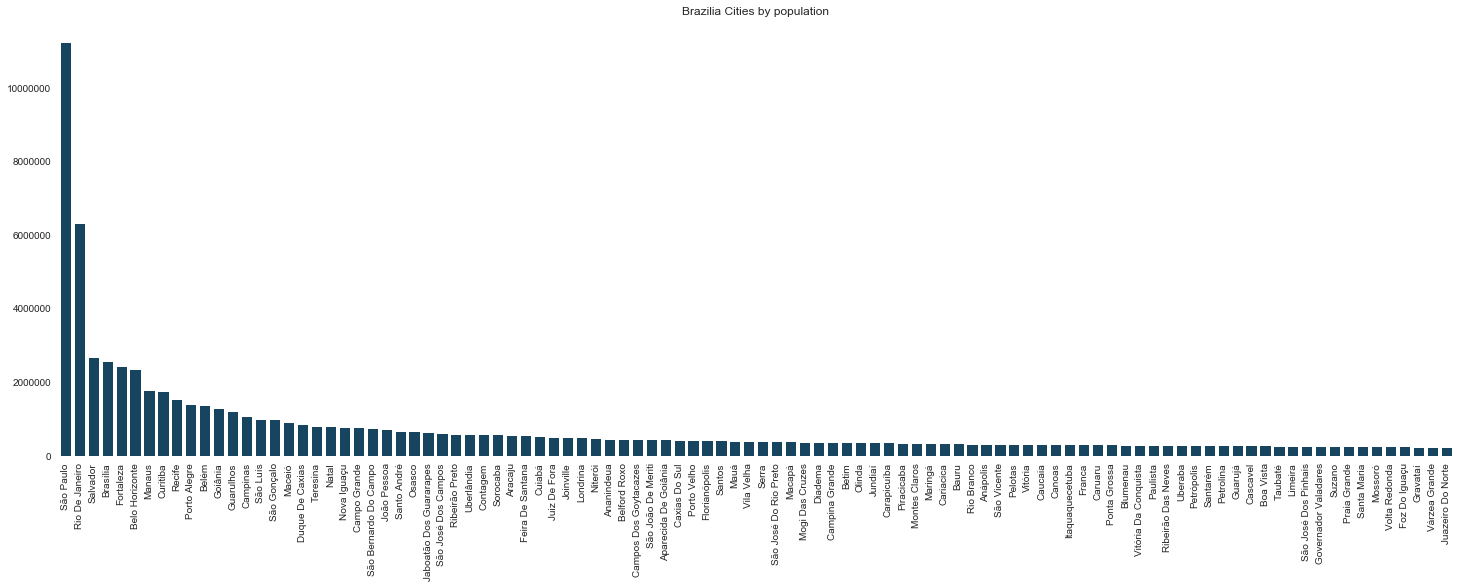

In [10]:
plt.figure(figsize=(25,8))
a1 = sns.barplot(y='IBGE_RES_POP',x='CITY',data=data.sort_values(by='IBGE_RES_POP',ascending=False).head(100),palette=['#0B486B']);
plt.ylabel('');
plt.xlabel('');
plt.xticks(rotation=90)
sns.despine(left=True,bottom=True)
a1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.title('Brazilia Cities by population');

In [11]:
states = data.groupby(['STATE'])['CITY'].count().sort_values(ascending=False)

In [12]:
states.reset_index()

,STATE,CITY
0,MG,853
1,SP,646
2,RS,498
3,BA,418
4,PR,400
5,SC,295
6,GO,246
7,PI,224
8,PB,223
9,MA,217


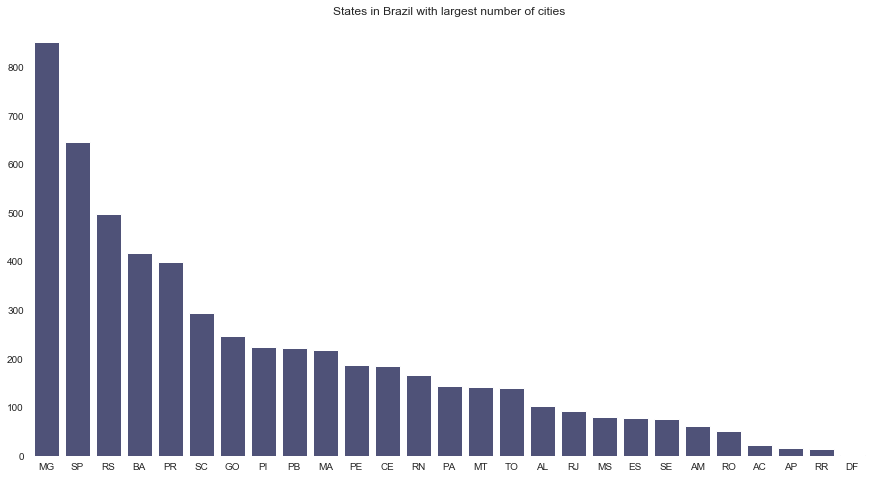

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x='STATE',y='CITY',data=states.reset_index(),palette=['#484c7f']);
plt.ylabel('');
plt.xlabel('');
sns.despine(left=True,bottom=True)
plt.title('States in Brazil with largest number of cities');

In [14]:
states_pop = data.groupby(['STATE'])['IBGE_RES_POP'].sum().sort_values(ascending=False)
states_pop.reset_index()

,STATE,IBGE_RES_POP
0,SP,41357343.0
1,MG,19597330.0
2,RJ,16027462.0
3,BA,14016906.0
4,RS,10693929.0
5,PR,10452673.0
6,PE,8796448.0
7,CE,8452381.0
8,PA,7581051.0
9,MA,6574789.0


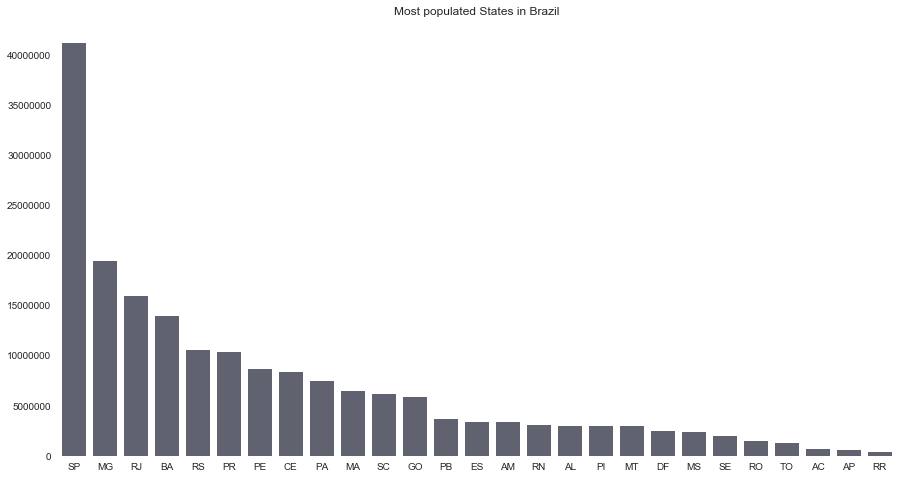

In [15]:
plt.figure(figsize=(15,8))
a2 = sns.barplot(x='STATE',y='IBGE_RES_POP',data=states_pop.reset_index(),palette=['#5e6073']);
plt.ylabel('');
plt.xlabel('');
sns.despine(left=True,bottom=True)
plt.title('Most populated States in Brazil');
a2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [66]:
pop_re = data.groupby(['STATE'])['IBGE_RES_POP_BRAS','IBGE_RES_POP_ESTR'].sum().reset_index()
pop_re['IBGE_RES_POP_ESTR K'] = pop_re['IBGE_RES_POP_ESTR']/1000
pop_re['IBGE_RES_POP_BRAS K'] = pop_re['IBGE_RES_POP_BRAS']/1000
pop_re['Ratio'] = pop_re['IBGE_RES_POP_ESTR']/pop_re['IBGE_RES_POP_BRAS']*100
pop_re.head()

,STATE,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_RES_POP_ESTR K,IBGE_RES_POP_BRAS K,Ratio
0,AC,732629.0,930.0,0.930,732.629,0.126940
1,AL,3119722.0,772.0,0.772,3119.722,0.024746
2,AM,3476932.0,7053.0,7.053,3476.932,0.202851
3,AP,668977.0,549.0,0.549,668.977,0.082066
4,BA,14006865.0,10041.0,10.041,14006.865,0.071686


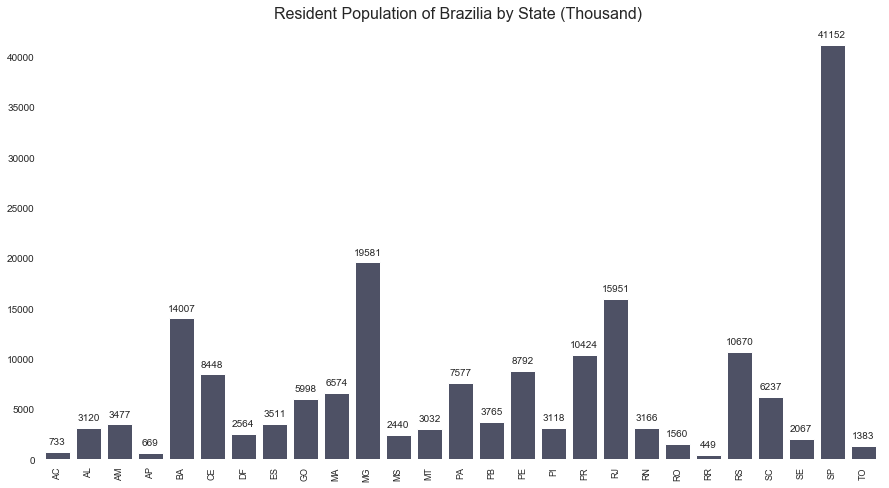

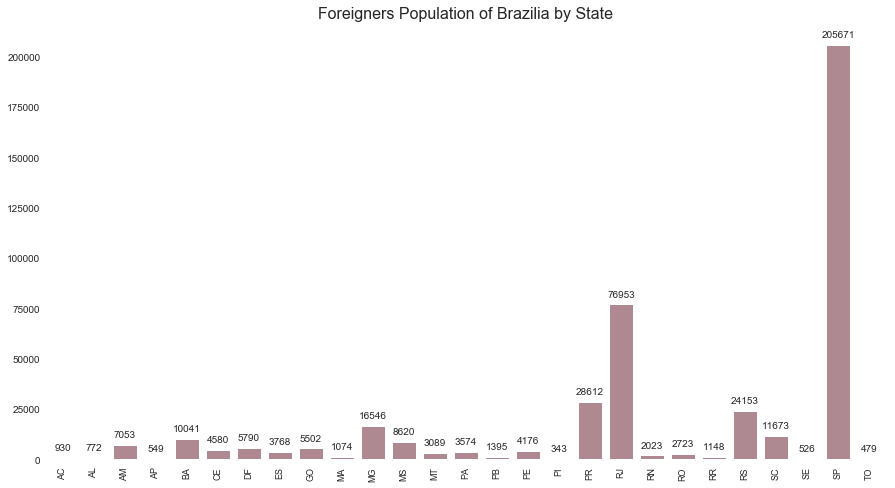

In [72]:
plt.figure(figsize=(15,8))
c = sns.barplot(y='IBGE_RES_POP_BRAS K',x='STATE',data=pop_re,palette=['#4A4E69'])
plt.xticks(fontsize=9,rotation=90)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
c.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('');
plt.ylabel('');
plt.title('Resident Population of Brazilia by State (Thousand) ',fontsize=16);
for p in c.patches:
    c.annotate("%.0f" % p.get_height(), 
               (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha='center', va='center', xytext=(0, 10), 
               textcoords='offset points')
plt.figure(figsize=(15,8))
d = sns.barplot(y='IBGE_RES_POP_ESTR',x='STATE',data=pop_re,palette=['#B5838D'])
plt.xticks(fontsize=9,rotation=90)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
d.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('');
plt.ylabel('');
plt.title('Foreigners Population of Brazilia by State',fontsize=16);
for p in d.patches:
    d.annotate("%.0f" % p.get_height(), 
               (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha='center', va='center', xytext=(0, 10), 
               textcoords='offset points')   

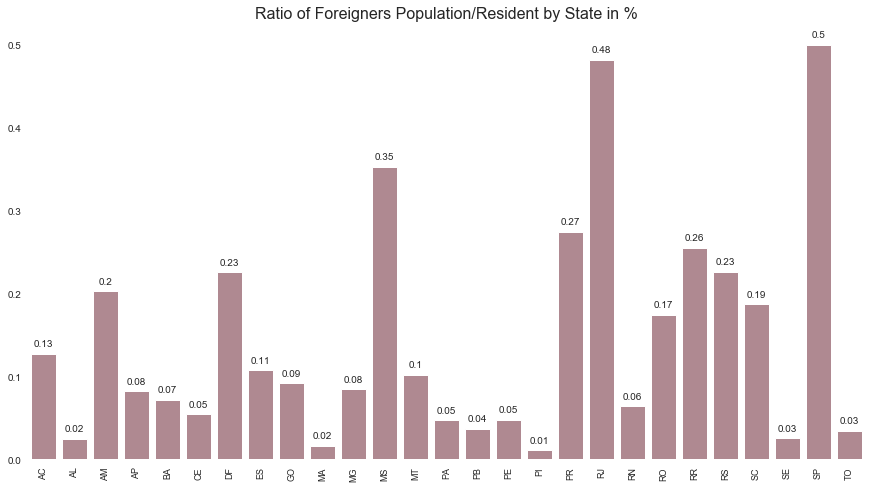

In [79]:
plt.figure(figsize=(15,8))
e = sns.barplot(y='Ratio',x='STATE',data=pop_re,palette=['#B5838D'])
plt.xticks(fontsize=9,rotation=90)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.xlabel('');
plt.ylabel('');
plt.title('Ratio of Foreigners Population/Resident by State in %',fontsize=16);
for p in e.patches:
    e.annotate(round(p.get_height(),2), 
               (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha='center', va='center', xytext=(0, 10), 
               textcoords='offset points')   

In [16]:
################################

In [17]:
capitals = df[df['CAPITAL']==1][features]

In [18]:
capitals.shape

(27, 21)

In [19]:
capitals.describe()

,CAPITAL,LONG,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IDHM Ranking 2010,IDHM,IDHM_Longevidade,IDHM_Educacao,TAXES,GVA_TOTAL,GDP_CAPITA,PAY_TV,COMP_TOT,HOTELS,Cars,Motorcycles,WAL-MART
count,27.0,27.000000,2.700000e+01,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,2.700000e+01,27.000000,2.700000e+01,27.000000,26.000000,2.700000e+01,2.700000e+01,19.000000
mean,1.0,-47.152056,1.683928e+06,1.675325e+06,8602.481481,350.777778,0.776407,0.834037,0.711037,8.551502e+06,5.820125e+07,33733.106667,2.562026e+05,58129.962963,19.076923,6.468387e+05,1.840096e+05,5.842105
std,0.0,9.113278,2.283769e+06,2.260164e+06,24557.231635,378.419419,0.035057,0.019693,0.043210,2.250484e+07,1.183570e+08,14631.835312,4.377665e+05,103327.779141,19.754337,1.126261e+06,2.072266e+05,6.693804
min,1.0,-67.810529,2.283320e+05,2.281310e+05,130.000000,3.000000,0.721000,0.798000,0.635000,7.087200e+02,2.318361e+04,19935.320000,1.403400e+04,4890.000000,1.000000,6.549500e+04,2.671100e+04,1.000000
25%,1.0,-51.143033,4.898125e+05,4.892835e+05,624.500000,38.500000,0.751000,0.821000,0.686000,8.321919e+05,1.073730e+07,23195.510000,5.623550e+04,17083.000000,5.750000,1.823745e+05,8.339400e+04,1.000000
50%,1.0,-47.887905,9.327480e+05,9.321340e+05,1776.000000,230.000000,0.770000,0.832000,0.708000,2.923558e+06,1.837068e+07,28974.170000,1.031850e+05,21530.000000,15.000000,2.293110e+05,1.192800e+05,3.000000
75%,1.0,-39.456068,1.776960e+06,1.770904e+06,3966.000000,528.000000,0.802000,0.850000,0.738000,5.670532e+06,4.693675e+07,38489.275000,2.274085e+05,57634.500000,22.750000,6.039565e+05,1.986530e+05,6.500000
max,1.0,-34.873385,1.125350e+07,1.113378e+07,119727.000000,1283.000000,0.847000,0.873000,0.805000,1.171254e+08,5.699105e+08,79099.770000,2.047668e+06,530446.000000,94.000000,5.740995e+06,1.134570e+06,26.000000


In [20]:
capitals.isnull().sum()

CITY                 0
STATE                0
CAPITAL              0
LONG                 0
IBGE_RES_POP         0
IBGE_RES_POP_BRAS    0
IBGE_RES_POP_ESTR    0
IDHM Ranking 2010    0
IDHM                 0
IDHM_Longevidade     0
IDHM_Educacao        0
TAXES                0
 GVA_TOTAL           0
GDP_CAPITA           0
PAY_TV               0
COMP_TOT             0
CATEGORIA_TUR        0
HOTELS               1
Cars                 0
Motorcycles          0
WAL-MART             8
dtype: int64

# Capitals by population:

In [21]:
capitals.sample()

,CITY,STATE,CAPITAL,LONG,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IDHM Ranking 2010,IDHM,IDHM_Longevidade,IDHM_Educacao,TAXES,GVA_TOTAL,GDP_CAPITA,PAY_TV,COMP_TOT,CATEGORIA_TUR,HOTELS,Cars,Motorcycles,WAL-MART
30,Belém,PA,1,-48.487826,1393399.0,1391623.0,1776.0,642.0,0.746,0.822,0.673,4474591.26,24952361.78,20350.0,128090.0,17741.0,A,18.0,231612.0,141727.0,NaN


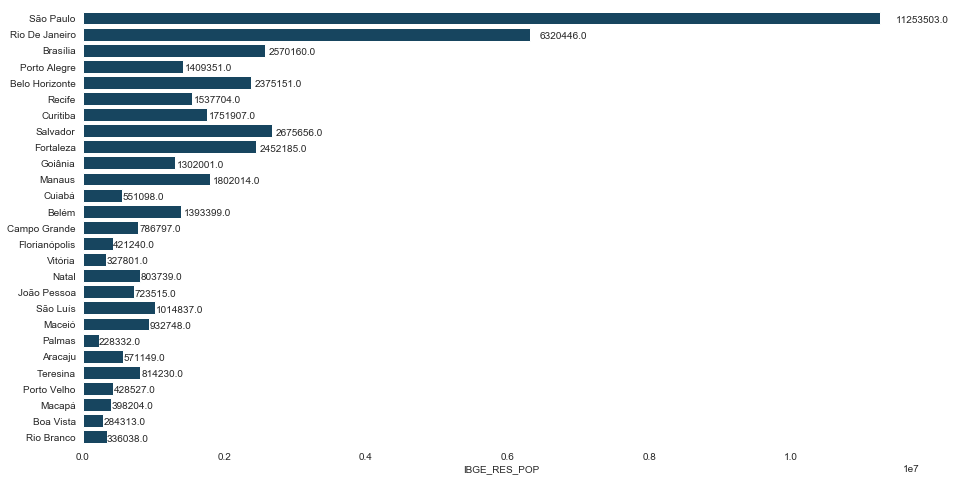

In [22]:
plt.figure(figsize=(15,8))
ax1 = sns.barplot(x='IBGE_RES_POP',y='CITY',data=capitals,palette=['#0B486B']);
plt.ylabel('');
sns.despine(left=True,bottom=True)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
for i, v in enumerate(capitals['IBGE_RES_POP']):
    ax1.text(1.02*v + 5, i + .25, str(v))
